# Deployment module : Getaround Project

In [1]:
# you might have to install openpyxl module
# !pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import openpyxl

# plot lib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
df_delay_analysis = pd.read_excel('src/get_around_delay_analysis.xlsx')

## Exploratory Data Analysis

In [4]:
# Basic stats
print("Number of rows + infos:")
print()
print("{}".format(df_delay_analysis.shape[0]))
print()
print("{}" .format(df_delay_analysis.info()))
print()

print("Display of dataset: ")
display(df_delay_analysis.head(10))
print()

print("Basics statistics: ")
data_desc = df_delay_analysis.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df_delay_analysis.isnull().sum()/df_delay_analysis.shape[0])

Number of rows + infos:

21310

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB
None

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

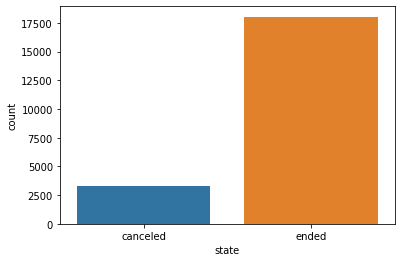

In [5]:
sns.countplot(data=df_delay_analysis, x='state')
plt.show()

In [6]:
# Correlation matrix
corr_matrix = df_delay_analysis.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

<AxesSubplot:xlabel='time_delta_with_previous_rental_in_minutes', ylabel='Count'>

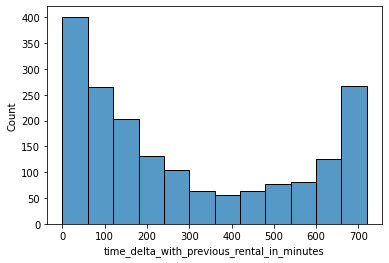

In [7]:
sns.histplot(df_delay_analysis, x='time_delta_with_previous_rental_in_minutes')

<AxesSubplot:xlabel='delay_at_checkout_in_minutes'>

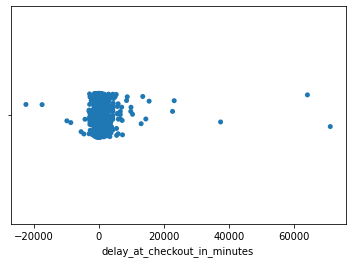

In [24]:
sns.stripplot(x=df_delay_analysis['delay_at_checkout_in_minutes'])

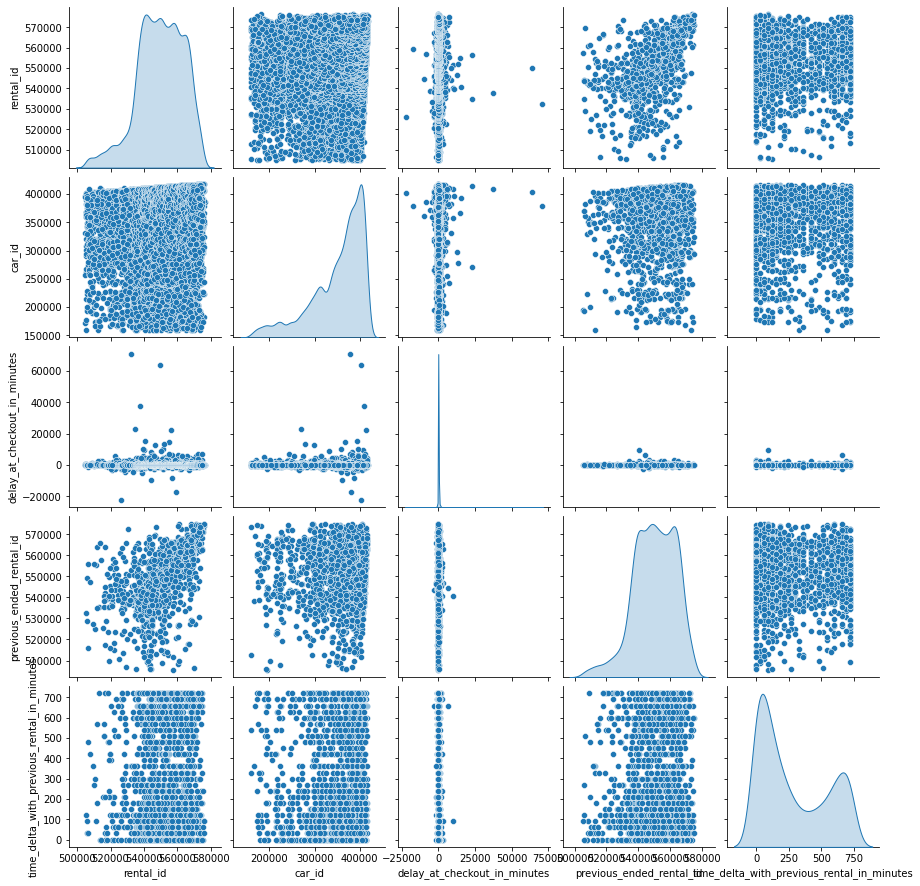

In [8]:
sns.pairplot(df_delay_analysis, diag_kind='kde')

In [10]:
df_delay_analysis['checkin_type'].value_counts()

mobile     17003
connect     4307
Name: checkin_type, dtype: int64

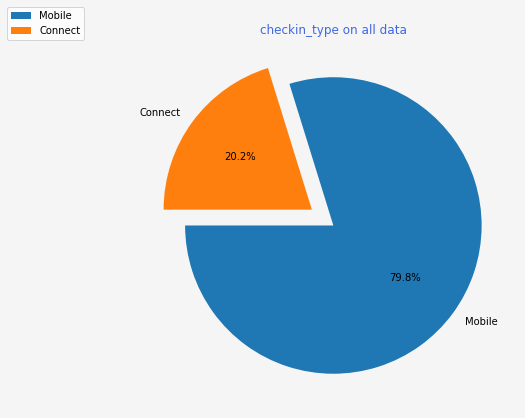

In [11]:
fig = plt.figure(figsize=(15,15), facecolor='whitesmoke')
labels = 'Mobile','Connect',
size3 = df_delay_analysis['checkin_type'].value_counts()
plt.subplot(2, 2, 1)
plt.pie(size3, 
labels=labels, 
autopct='%1.1f%%',
textprops={'color':'black'},
explode=[0, 0.18], 
startangle = 180
)
plt.title('checkin_type on all data', fontdict={'color':'royalblue'})
plt.legend(loc=(-0.38,1))
plt.show()

In [12]:
df_delay_analysis.groupby('state')['checkin_type'].value_counts()

state     checkin_type
canceled  mobile           2467
          connect           798
ended     mobile          14536
          connect          3509
Name: checkin_type, dtype: int64

In [13]:
df_canceled_2 = df_delay_analysis[df_delay_analysis['state']=="canceled"]
df_ended_2 = df_delay_analysis[df_delay_analysis['state']=="ended"]

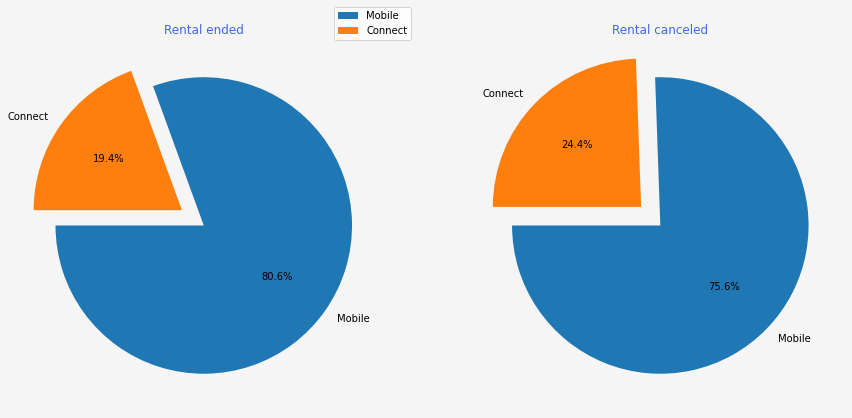

In [14]:
fig = plt.figure(figsize=(15,15), facecolor='whitesmoke')

labels = 'Mobile','Connect',

size1 = df_ended_2.groupby('state')['checkin_type'].value_counts()
size2 = df_canceled_2.groupby('state')['checkin_type'].value_counts()


plt.subplot(2, 2, 1)
plt.pie(size1, 
labels=labels, 
autopct='%1.1f%%',
textprops={'color':'black'},
explode=[0, 0.18], 
startangle = 180
)
plt.title('Rental ended', fontdict={'color':'royalblue'})

plt.subplot(2, 2, 2)
plt.pie(size2,
labels=labels, 
autopct='%1.1f%%',
textprops={'color':'black'},
explode=[0, 0.18], 
startangle = 180
)
plt.title('Rental canceled', fontdict={'color':'royalblue'})
plt.legend(loc=(-0.38,1))
plt.show()

### Focusing on "delay_at_checkout_in_minutes" column for ou analysis, considering:
- values <= 0.0 as checkout in time
- values > 0.0 as late driver for checkout

#### Creating categories

In [15]:
print(df_delay_analysis['delay_at_checkout_in_minutes'].max())
print(df_delay_analysis['delay_at_checkout_in_minutes'].min())


71084.0
-22433.0


In [17]:
list_to_add = []

for value in df_delay_analysis['delay_at_checkout_in_minutes']:
    # if value == True:
    #     list_to_add.append('NaN')
    if value < 0.0:
        list_to_add.append('in_time')
    elif value > 0.0 and value <= 1440.0:                   # 24 * 60.0 = 1440 day1
        list_to_add.append('late <= 1 day')             
    elif value > 1440.0 and value <= 2880.0:                # 2 days
        list_to_add.append('late btw 1 and 2 days')
    elif value > 2880.0 and value <= 4320.0:                # 3 days
        list_to_add.append('late btw 2 and 3 days')
    elif value > 4320.0 and value <= 5760.0:                # 4 days
        list_to_add.append('late btw 3 and 4 days')
    elif value > 4320.0 and value <= 7200.0:                # 5 days
        list_to_add.append('late btw 4 and 5 days')
    elif value > 7200.0 and value <= 8640.0:                # 6 days
        list_to_add.append('late btw 5 and 6 days')
    elif value > 8640.0 and value <= 10080.0:               # 7 days
        list_to_add.append('late btw 6 and 7 days')
    elif value > 10080.0 and value <= 11520.0:              # 8 days
        list_to_add.append('late btw 7 and 8 days')
    elif value > 11520.0 and value <= 12960.0:              # 9 days
        list_to_add.append('late btw 8 and 9 days')
    elif value > 12960.0 and value <= 14400.0:              # 10 days
        list_to_add.append('late btw 9 and 10 days')
    elif value > 14400.0:
        list_to_add.append('late more than 10 days') 
    else: 
        list_to_add.append("NaN")

In [18]:
set(list_to_add)

{'NaN',
 'in_time',
 'late <= 1 day',
 'late btw 1 and 2 days',
 'late btw 2 and 3 days',
 'late btw 3 and 4 days',
 'late btw 4 and 5 days',
 'late btw 5 and 6 days',
 'late btw 6 and 7 days',
 'late btw 7 and 8 days',
 'late btw 9 and 10 days',
 'late more than 10 days'}

In [19]:
df_delay_analysis['late_groups'] = list_to_add

In [20]:
df_delay_analysis.head(2)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,late_groups
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN,in_time


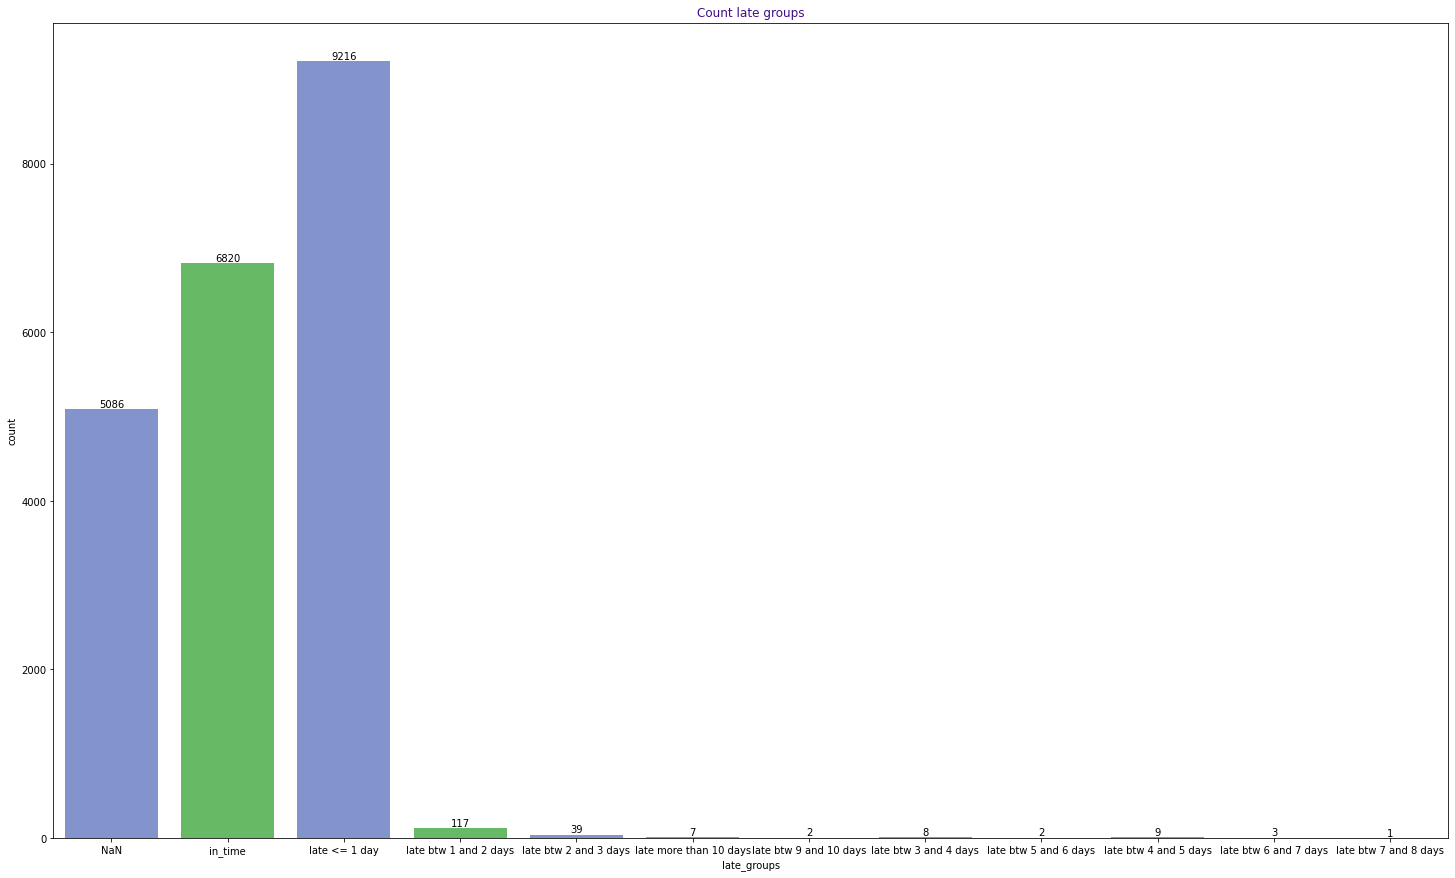

In [32]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x='late_groups', data=df_delay_analysis,  palette=['#778cd8',"#59c758"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count late groups', fontdict={'color':'#410d88'})

plt.show()

### According to these results, I will :
- Zoom on values and modify the categories in late_groups column
- Drop NA values

In [33]:
df_delay_analysis_na_dropped = df_delay_analysis.dropna()

In [108]:
list_to_add = []

for value in df_delay_analysis_na_dropped['delay_at_checkout_in_minutes']:
    if value <= -60.0 :
        list_to_add.append('early more than 1 hour')
    elif value > -60.0 and value <= -30.0:
        list_to_add.append('early btw 60 and 30 min')
    elif value > -30.0 and value <= 0.0:
        list_to_add.append('early less than 30 min')
    elif value > 0.0 and value <= 30.0:
        list_to_add.append('late <= 30 min')
    elif value > 30.0 and value <= 60.0:
        list_to_add.append('late btw 30 min and 1 hour')
    elif value > 60.0 and value <= 120.0:
        list_to_add.append('late btw 1 and 2 hours')
    elif value > 120.0 and value <= 180.0:
        list_to_add.append('late btw 2 and 3 hours')
    elif value > 180.0 and value <= 240.0:
        list_to_add.append('late btw 3 and 4 hours')
    elif value > 240.0 and value <= 360:
        list_to_add.append('late btw 4 and 6 hours')
    elif value > 360 and value <= 1440.0:                   # 24 * 60.0 = 1440 day1
        list_to_add.append('late btw 6h and 1 day')             
    elif value > 1440.0 and value <= 2880.0:                # 2 days
        list_to_add.append('late btw 1 and 2 days')
    elif value > 2880.0 and value <= 4320.0:                # 3 days
        list_to_add.append('late btw 2 and 3 days')
    elif value > 4320.0 and value <= 5760.0:                # 4 days
        list_to_add.append('late btw 3 and 4 days')
    elif value > 4320.0 and value <= 7200.0:                # 5 days
        list_to_add.append('late btw 4 and 5 days')
    elif value > 7200.0 and value <= 8640.0:                # 6 days
        list_to_add.append('late btw 5 and 6 days')
    elif value > 8640.0 and value <= 10080.0:               # 7 days
        list_to_add.append('late btw 6 and 7 days')
    elif value > 10080.0 and value <= 11520.0:              # 8 days
        list_to_add.append('late btw 7 and 8 days')
    elif value > 11520.0 and value <= 12960.0:              # 9 days
        list_to_add.append('late btw 8 and 9 days')
    elif value > 12960.0 and value <= 14400.0:              # 10 days
        list_to_add.append('late btw 9 and 10 days')
    else:
        list_to_add.append('late more than 10 days') 

In [109]:
df_delay_analysis_na_dropped['late_groups'] = list_to_add

In [110]:
df_delay_analysis_na_dropped['late_groups'].value_counts()

early more than 1 hour        331
late <= 30 min                264
early less than 30 min        250
late btw 30 min and 1 hour    187
late btw 1 and 2 hours        166
early btw 60 and 30 min       132
late btw 2 and 3 hours         59
late btw 6h and 1 day          45
late btw 3 and 4 hours         38
late btw 4 and 6 hours         29
late btw 1 and 2 days          10
late btw 2 and 3 days           2
late btw 4 and 5 days           1
late btw 6 and 7 days           1
Name: late_groups, dtype: int64

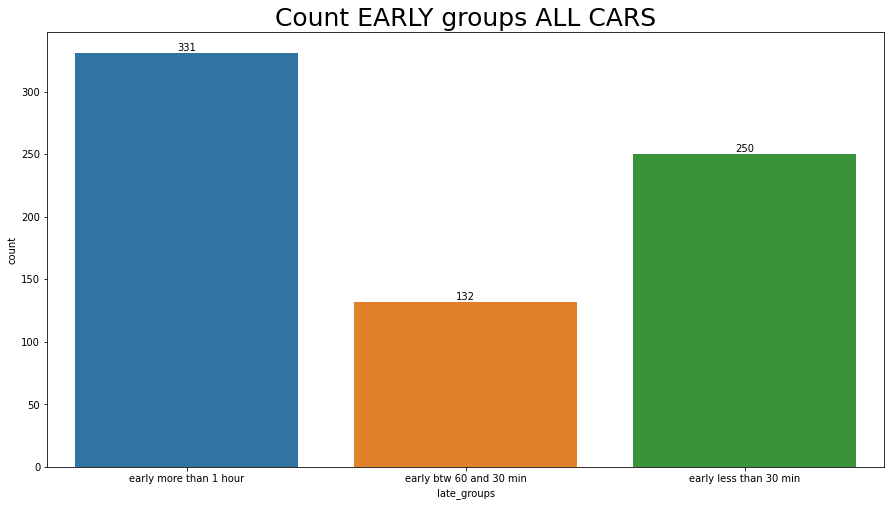

In [113]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='late_groups', 
                    data=df_delay_analysis_na_dropped,  
                    #palette=['#778cd8',"#59c758"],
                    order=[
                    #'in_time', 
                    'early more than 1 hour', 
                    'early btw 60 and 30 min',
                    'early less than 30 min',
                    # 'late btw 1 and 2 hours',
                    # 'late btw 2 and 3 hours', 
                    # 'late btw 3 and 4 hours', 
                    # 'late btw 4 and 6 hours', 
                    # 'late btw 6h and 1 day','late btw 1 and 2 days'
                    ]
                    
                    )
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count EARLY groups ALL CARS', 
            #fontdict={'color':'#410d88'},
            fontsize=25,
            )

plt.show()

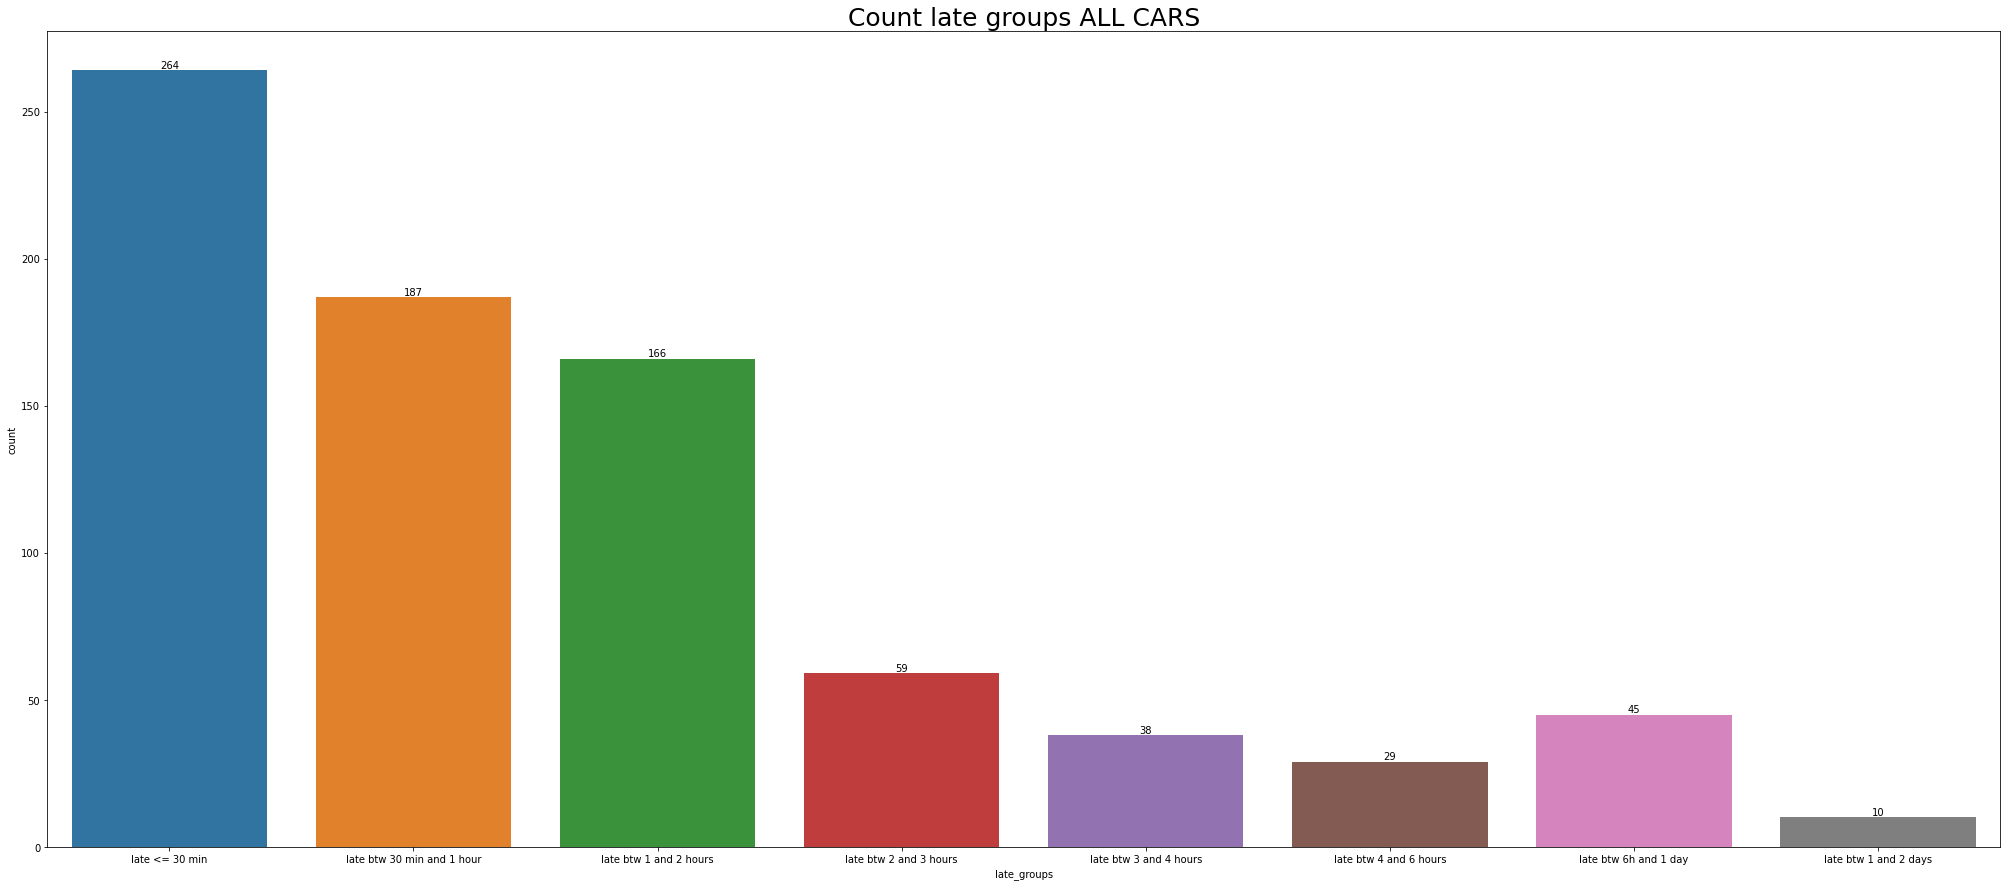

In [98]:
plt.figure(figsize=(35,15))
ax = sns.countplot(x='late_groups', 
                    data=df_delay_analysis_na_dropped,  
                    #palette=['#778cd8',"#59c758"],
                    order=[
                    #'in_time', 
                    'late <= 30 min', 
                    'late btw 30 min and 1 hour', 
                    'late btw 1 and 2 hours',
                    'late btw 2 and 3 hours', 
                    'late btw 3 and 4 hours', 
                    'late btw 4 and 6 hours', 
                    'late btw 6h and 1 day','late btw 1 and 2 days'
                    ]
                    
                    )
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count late groups ALL CARS', 
            #fontdict={'color':'#410d88'},
            fontsize=25,
            )

plt.show()

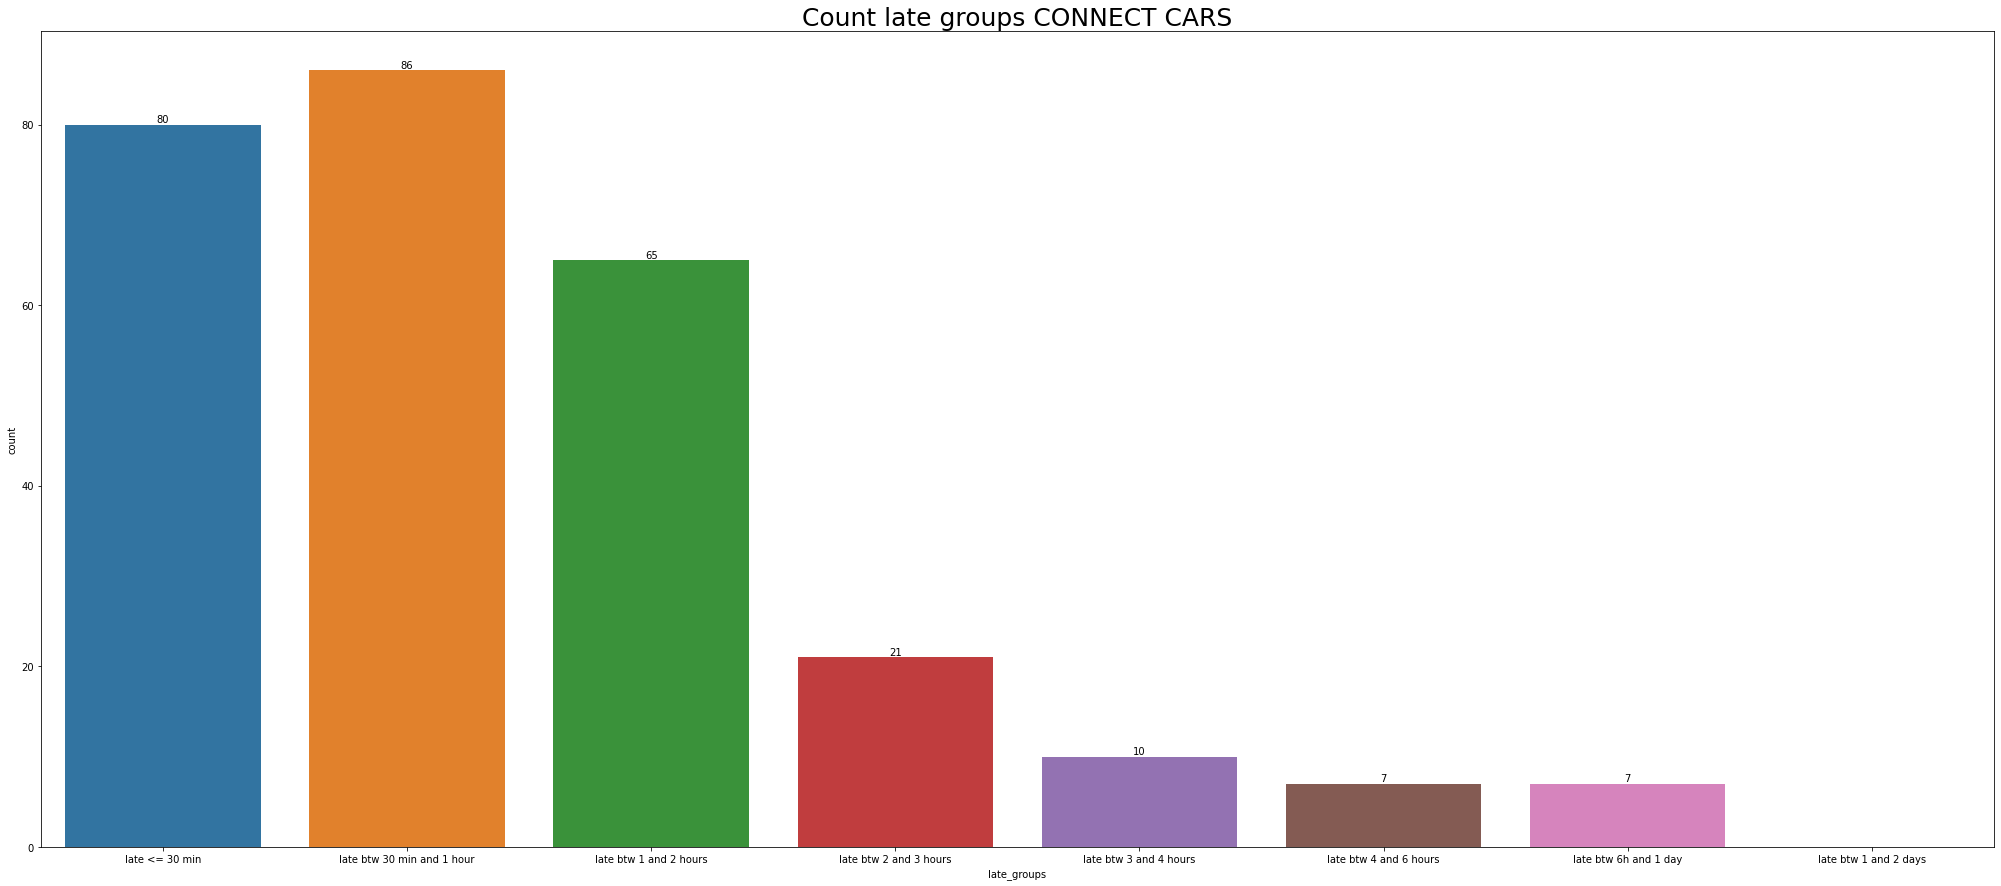

In [99]:
plt.figure(figsize=(35,15))
ax = sns.countplot(x='late_groups', 
                    data=df_delay_analysis_na_dropped[df_delay_analysis_na_dropped['checkin_type']=='connect'],  
                    #palette=['#778cd8',"#59c758"],
                    order=[
                    #'in_time', 
                    'late <= 30 min', 
                    'late btw 30 min and 1 hour', 
                    'late btw 1 and 2 hours',
                    'late btw 2 and 3 hours', 
                    'late btw 3 and 4 hours', 
                    'late btw 4 and 6 hours', 
                    'late btw 6h and 1 day','late btw 1 and 2 days'
                    ]
                    )
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count late groups CONNECT CARS', 
            #fontdict={'color':'#410d88'},
            fontsize=25,
            )

plt.show()

In [114]:
df_delay_analysis_na_dropped.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes', 'late_groups'],
      dtype='object')

In [124]:
list_to_add = []

for value in df_delay_analysis_na_dropped['time_delta_with_previous_rental_in_minutes']:
    if value >= 0.0 and value <= 30.0 :
        list_to_add.append('time delta btw 0 and 30 min')
    else:
        list_to_add.append('time delta > 30 min')

In [125]:
df_delay_analysis_na_dropped['time_delta_with_previous_rental_in_minutes'].min()

0.0

In [126]:
df_delay_analysis_na_dropped['time_delta_with_previous_rental_in_minutes'].max()

720.0

In [127]:
df_delay_analysis_na_dropped['time_delta_previous_rental_groups'] = list_to_add

In [129]:
df_delay_analysis_na_dropped['time_delta_previous_rental_groups'].value_counts(normalize=True)

time delta > 30 min            0.778878
time delta btw 0 and 30 min    0.221122
Name: time_delta_previous_rental_groups, dtype: float64

In [131]:
# we don't have data about canceled rent and therefore the reasons 

In [135]:
df_delay_analysis.groupby('car_id')['state'].value_counts(ascending=False)

car_id  state   
159250  ended       2
159533  ended       5
        canceled    2
159536  ended       8
160061  ended       2
                   ..
416930  canceled    1
416935  canceled    1
416992  ended       1
417181  ended       1
417675  ended       1
Name: state, Length: 9782, dtype: int64